In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2022.csv', 
                   dtype={'Summon Number': np.int64, 
                          'Plate ID': object, 
                         'Registration State': object, 
                         'Plate Type': object, 
                         'Issue Date': object, 
                         'Violation Code': np.int64, 
                         'Vehicle Body Type': object, 
                         'Vehicle Make': object, 
                         'Issuing Agency': object, 
                         'Street Code1': np.int64, 
                         'Street Code2': np.int64, 
                         'Street Code3': np.int64, 
                         'Vehicle Expiration Date': np.int64, 
                         'Violation Loation': np.float64, 
                         'Violation Precinct': np.int64, 
                         'Issuer Precinct': np.int64,
                         'Issuer Code': np.int64, 
                         'Issuer Command': object, 
                         'Issuer Squad': object, 
                         'Violation Time': object, 
                         'Time First Observed': object, 
                         'Violaion County': object, 
                         'Violation In Front Of Or Opposite': object, 
                         'House Number': object, 
                         'Street Name': object, 
                         'Intersecting Street': object, 
                         'Date First Observed': np.int64, 
                         'Law Section': np.int64, 
                         'Sub Division': object, 
                         'Violation Legal Code': object,
                         'Days Parking In Effect': object, 
                         'From Hours In Effect': object, 
                         'To Hours In Effect': object, 
                         'Vehicle Color': object, 
                         'Unregistered Vehicle?': np.float64, 
                         'Vehicle Year': np.int64, 
                         'Meter Number': object, 
                         'Feet From Curb': np.int64,
                         'Violation Post Code': object, 
                         'Violation Description': object, 
                         'No Standig or Stopping Violation': np.float64, 
                         'Hydrant Violation': np.float64, 
                         'Double Parking Violation': np.float64}, low_memory=False)
data.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1457617912,JEB5683,NY,PAS,06/25/2021,40,VAN,FORD,P,63430,...,GY,0.0,2007,-,3,NaN,NaN,NaN,NaN,NaN
1,1457617924,JAN2986,NY,PAS,06/25/2021,20,SUBN,DODGE,P,13490,...,BLU,0.0,2007,-,0,NaN,NaN,NaN,NaN,NaN
2,1457622427,FJH6630,TX,PAS,06/17/2021,98,SDN,AUDI,P,79430,...,WHITE,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1457638629,RD1Y5N,MO,PAS,06/16/2021,98,SDN,TOYOT,P,53130,...,TAN,0.0,2001,-,0,NaN,NaN,NaN,NaN,NaN
4,1457639580,T503814C,NY,OMT,07/04/2021,40,TAXI,HONDA,P,81030,...,WHI,0.0,2020,-,0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dtypes

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

In [5]:
data['Issue Date'] = pd.to_datetime(data['Issue Date'], errors='coerce')

In [6]:
data.dtypes.head(5)

Summons Number                 int64
Plate ID                      object
Registration State            object
Plate Type                    object
Issue Date            datetime64[ns]
dtype: object

In [7]:
data.isnull().sum()

Summons Number                             0
Plate ID                                  64
Registration State                         0
Plate Type                                 0
Issue Date                                 0
Violation Code                             0
Vehicle Body Type                      11238
Vehicle Make                            3612
Issuing Agency                             0
Street Code1                               0
Street Code2                               0
Street Code3                               0
Vehicle Expiration Date                    0
Violation Location                   2144775
Violation Precinct                         0
Issuer Precinct                            0
Issuer Code                                0
Issuer Command                       2143126
Issuer Squad                         2270874
Violation Time                            63
Time First Observed                  5084912
Violation County                       10734
Violation 

In [8]:
clear_data = data.fillna(0) # Filling null values
clear_data.isnull().sum() # Checking if any null remains

Summons Number                       0
Plate ID                             0
Registration State                   0
Plate Type                           0
Issue Date                           0
Violation Code                       0
Vehicle Body Type                    0
Vehicle Make                         0
Issuing Agency                       0
Street Code1                         0
Street Code2                         0
Street Code3                         0
Vehicle Expiration Date              0
Violation Location                   0
Violation Precinct                   0
Issuer Precinct                      0
Issuer Code                          0
Issuer Command                       0
Issuer Squad                         0
Violation Time                       0
Time First Observed                  0
Violation County                     0
Violation In Front Of Or Opposite    0
House Number                         0
Street Name                          0
Intersecting Street      

In [9]:
clear_data.head(10) # reading data

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1457617912,JEB5683,NY,PAS,2021-06-25,40,VAN,FORD,P,63430,...,GY,0.0,2007,-,3,0,0,0.0,0.0,0.0
1,1457617924,JAN2986,NY,PAS,2021-06-25,20,SUBN,DODGE,P,13490,...,BLU,0.0,2007,-,0,0,0,0.0,0.0,0.0
2,1457622427,FJH6630,TX,PAS,2021-06-17,98,SDN,AUDI,P,79430,...,WHITE,0.0,0,-,0,0,0,0.0,0.0,0.0
3,1457638629,RD1Y5N,MO,PAS,2021-06-16,98,SDN,TOYOT,P,53130,...,TAN,0.0,2001,-,0,0,0,0.0,0.0,0.0
4,1457639580,T503814C,NY,OMT,2021-07-04,40,TAXI,HONDA,P,81030,...,WHI,0.0,2020,-,0,0,0,0.0,0.0,0.0
5,1457643042,JLN5490,NY,PAS,2021-06-28,98,SDN,HONDA,P,0,...,GRY,0.0,2015,-,0,0,0,0.0,0.0,0.0
6,1457663909,UMB4505,VA,PAS,2021-07-02,98,SDN,SUBAR,P,42130,...,GREEN,0.0,0,-,0,0,0,0.0,0.0,0.0
7,1457670471,JPS7544,NY,PAS,2021-06-19,40,SDN,NISSA,P,85330,...,RED,0.0,2015,-,0,0,0,0.0,0.0,0.0
8,1457670537,UPS7544,NY,PAS,2021-06-19,70,SDN,NISSA,P,85330,...,RED,0.0,2015,-,0,0,0,0.0,0.0,0.0
9,1457677623,07027R5,TX,PAS,2021-07-03,74,SUBN,LEXUS,P,46820,...,WHT,0.0,2017,-,0,0,0,0.0,0.0,0.0


In [10]:
clear_data.shape  # Total rows and columns

(5346917, 43)

**Total number for violation by county**

Violation County
NY       1291312
QN        751865
Q         692948
BX        685936
BK        677955
K         642043
MN        280420
ST        139828
Kings      62251
R          61029
Bronx      32241
Qns        18308
0          10734
Rich          43
RICH           3
RICHM          1
Name: Violation Code, dtype: int64

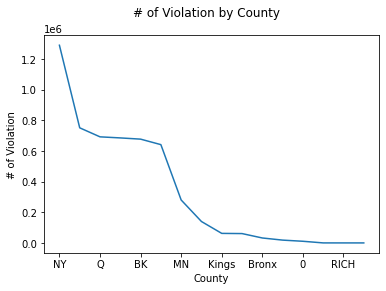

In [12]:
import matplotlib.pyplot as plt
v_count = clear_data.groupby('Violation County')['Violation Code'].count().sort_values(ascending=False)
v_count.plot()
plt.suptitle('# of Violation by County')
plt.xlabel('County')
plt.ylabel('# of Violation')

v_count

**Sorting Violation only for County = Q**

In [13]:
# Queens = clear_data['Violation County']== 'Q'
q_county = clear_data[['Violation County', 'Violation Code']] # Selecting only two columns
q_only = q_county[q_county['Violation County'] == 'Q']
q_only.sort_values(by='Violation Code').head(10).sort_values(by='Violation Code', ascending=False)

,Violation County,Violation Code
4293407,Q,0
3992595,Q,0
2316019,Q,0
2223035,Q,0
2241222,Q,0
458738,Q,0
4272810,Q,0
4943029,Q,0
509694,Q,0
2317840,Q,0


**Importing another CSV with violation fine and codes**

In [14]:
column = ['Violation Code','Definition', 'Manhattan 96th St. & below', 'All Other Areas'] # setting column names
v_code = pd.read_csv('ParkingViolationCodes_January2020.csv', names=column, header=None ) # imporint CSV
code = v_code.iloc[1:] # selecting column from 2nd row 
code.shape

(97, 4)

In [15]:
code

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
1,1,FAILURE TO DISPLAY BUS PERMIT,515,515
2,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
3,3,UNAUTHORIZED PASSENGER PICK-UP,515,515
4,4,BUS PARKING IN LOWER MANHATTAN,115,115
5,5,BUS LANE VIOLATION,50,50
...,...,...,...,...
93,93,REMOVE/REPLACE FLAT TIRE,65,65
94,96,RAILROAD CROSSING,95,95
95,97,VACANT LOT,65,45
96,98,OBSTRUCTING DRIVEWAY,95,95


In [16]:
code.dtypes

Violation Code                object
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

Since, all 4 columns are object, we need to change column 'Violation Code', 'Manhattan 96th St. & below' & 'All Other Areas' to numeric datatype. 

In [19]:
row = code.loc[code['Violation Code']=='93']
code = code.append([row]*1, ignore_index=True) # copying row and apppend
code.shape

(98, 4)

In [20]:
code.loc[code['Violation Code']=='93'] # printing just to confirm

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
92,93,REMOVE/REPLACE FLAT TIRE,65,65
97,93,REMOVE/REPLACE FLAT TIRE,65,65


In [54]:
# converting datatype of 'Violation Code' column to numeric
code['Violation Code'] = pd.to_numeric(code['Violation Code'], errors='coerce') 

In [25]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

In [26]:
code.loc[[73, 80]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
73,74,FRONT OR BACK PLATE MISSING,65,65
80,81,NO STANDING EXCP DP,95,95


In [27]:
code.head(10)

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,1,FAILURE TO DISPLAY BUS PERMIT,515,515
1,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
2,3,UNAUTHORIZED PASSENGER PICK-UP,515,515
3,4,BUS PARKING IN LOWER MANHATTAN,115,115
4,5,BUS LANE VIOLATION,50,50
5,6,OVERNIGHT TRACTOR TRAILER PKG,265,265
6,7,FAILURE TO STOP AT RED LIGHT,50,50
7,8,IDLING,115,115
8,9,OBSTRUCTING TRAFFIC/INTERSECT,115,115
9,10,NO STOPPING-DAY/TIME LIMITS,115,115


In [29]:
code.fillna(0) # Changing null values to 0

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,1,FAILURE TO DISPLAY BUS PERMIT,515,515
1,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
2,3,UNAUTHORIZED PASSENGER PICK-UP,515,515
3,4,BUS PARKING IN LOWER MANHATTAN,115,115
4,5,BUS LANE VIOLATION,50,50
...,...,...,...,...
93,96,RAILROAD CROSSING,95,95
94,97,VACANT LOT,65,45
95,98,OBSTRUCTING DRIVEWAY,95,95
96,99,OTHER,105,105


In [30]:
code.loc[[77], 'Manhattan 96th St. & below'] = '60'
code.loc[[77], 'All Other Areas'] = '60'
code.loc[[81], 'Manhattan 96th St. & below'] = '50'
code.loc[[81], 'All Other Areas'] = '50'
code.loc[[82], 'Manhattan 96th St. & below'] = '115'
code.loc[[82], 'All Other Areas'] = '115'

In [31]:
code.loc[[77, 81, 82]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
77,78,NGHT PKG ON RESID STR-COMM VEH,60,60
81,82,COMML PLATES-UNALTERED VEHICLE,50,50
82,83,IMPROPER REGISTRATION,115,115


In [32]:
code.isnull().sum()

Violation Code                0
Definition                    0
Manhattan 96th St. & below    0
All Other Areas               0
dtype: int64

In [33]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

In [34]:
code['Manhattan 96th St. & below'] = pd.to_numeric(code['Manhattan 96th St. & below'], errors='coerce')
code['All Other Areas'] = pd.to_numeric(code['All Other Areas'], errors='coerce')

In [35]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below     int64
All Other Areas                int64
dtype: object

In [36]:
code.head()

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,1,FAILURE TO DISPLAY BUS PERMIT,515,515
1,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
2,3,UNAUTHORIZED PASSENGER PICK-UP,515,515
3,4,BUS PARKING IN LOWER MANHATTAN,115,115
4,5,BUS LANE VIOLATION,50,50


**Merging two data based on 'Violation Code'**

In [37]:
merge = pd.merge(q_only, code, on='Violation Code')
merge.head(5)

,Violation County,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,Q,98,OBSTRUCTING DRIVEWAY,95,95
1,Q,98,OBSTRUCTING DRIVEWAY,95,95
2,Q,98,OBSTRUCTING DRIVEWAY,95,95
3,Q,98,OBSTRUCTING DRIVEWAY,95,95
4,Q,98,OBSTRUCTING DRIVEWAY,95,95


**Revenue generated by violaton in county 'Q'**

In [38]:
merge[['Violation Code', 'All Other Areas']].agg({'All Other Areas': np.sum})

All Other Areas    57083045
dtype: int64

In [41]:
#Merging violation fine with all data
new_merge = pd.merge(clear_data, code, on='Violation Code')
new_merge.head(10)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Definition,Manhattan 96th St. & below,All Other Areas
0,1457617912,JEB5683,NY,PAS,2021-06-25,40,VAN,FORD,P,63430,...,-,3,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
1,1457639580,T503814C,NY,OMT,2021-07-04,40,TAXI,HONDA,P,81030,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
2,1457670471,JPS7544,NY,PAS,2021-06-19,40,SDN,NISSA,P,85330,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
3,1457677635,07027R5,TX,PAS,2021-07-03,40,SUBN,LEXUS,P,46820,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
4,1457733365,HGR2844,NY,PAS,2021-07-06,40,SDN,HONDA,P,72720,...,-,1,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
5,1457742858,079790T,NJ,PAS,2021-06-27,40,SDN,0,P,0,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
6,1457944558,EVK5593,NY,PAS,2021-06-18,40,SUBN,HYUND,P,67530,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
7,1459585604,Y58MKP,99,PAS,2021-07-12,40,SDN,ME/BE,P,39490,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
8,1459587420,KPJ1337,NY,PAS,2021-07-16,40,SDN,HONDA,P,20940,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115
9,1459587613,KKS8812,NY,999,2021-07-13,40,P-U,FORD,P,8440,...,-,0,0,0,0.0,0.0,0.0,FIRE HYDRANT,115,115


In [42]:
Selected_data = new_merge[['Violation Code', 
                          'Issuing Agency', 
                          'Issue Date',
                           'Violation County', 
                          'All Other Areas']]
Selected_data['# of Violation'] = Selected_data['All Other Areas']
Selected_data['Revenue'] = Selected_data['All Other Areas']

Selected_data.head()
top100_selected = Selected_data.head(100).sort_values(by='# of Violation', ascending=False)

<ipython-input-42-f53faaf798d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected_data['# of Violation'] = Selected_data['All Other Areas']
<ipython-input-42-f53faaf798d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected_data['Revenue'] = Selected_data['All Other Areas']


In [43]:
Selected_data.head()

,Violation Code,Issuing Agency,Issue Date,Violation County,All Other Areas,# of Violation,Revenue
0,40,P,2021-06-25,K,115,115,115
1,40,P,2021-07-04,K,115,115,115
2,40,P,2021-06-19,0,115,115,115
3,40,P,2021-07-03,BX,115,115,115
4,40,P,2021-07-06,0,115,115,115


**Top violation code grouped by county and total number**

# of Violation
Violation Code Violation County                
36             QN                        616616
               BK                        544386
38             Q                         233930
               NY                        229858
36             BX                        228015
14             NY                        168954
21             K                         152830
20             NY                        143452
36             MN                        143097
38             K                         132166

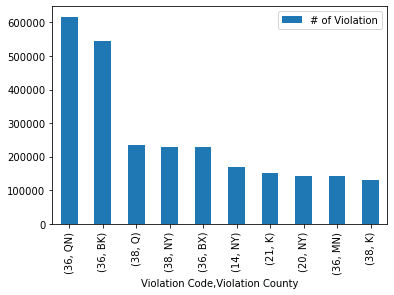

In [44]:
violation_group = Selected_data.groupby(['Violation Code', 'Violation County']).count().sort_values(by='# of Violation', ascending=False)
top10 = violation_group[['# of Violation']].head(10)
top10.plot.bar()
top10

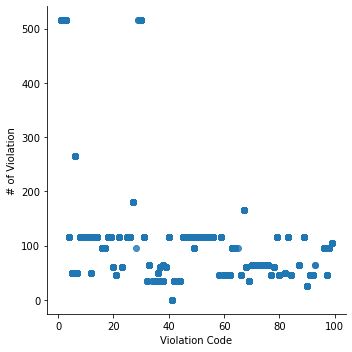

In [53]:
import seaborn as sns
sns.lmplot('Violation Code', '# of Violation', data= Selected_data, fit_reg=False)

**Revenue generated in county by violation code**

Revenue
Violation Code Violation County          
36             QN                30830800
               BK                27219300
14             NY                19429710
38             Q                 11696500
               NY                11492900
36             BX                11400750
31             NY                10207860
40             NY                 8864775
20             NY                 8607120
40             K                  8382465

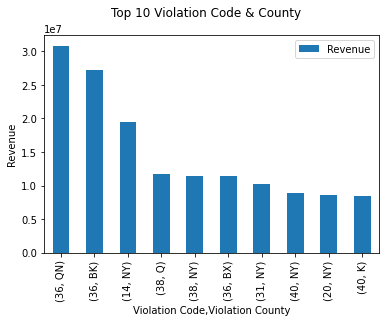

In [46]:
a_data = Selected_data.groupby(['Violation Code', 'Violation County']). agg({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar()
plt.suptitle('Top 10 Violation Code & County')
plt.ylabel('Revenue')
top10_data

**Top 10 violation code and revenue generated**

,Revenue
Violation Code,
36,82627100
14,37340500
38,34829000
40,32054985
21,24984720
20,16225680
46,14061395
71,13911885
5,12104700


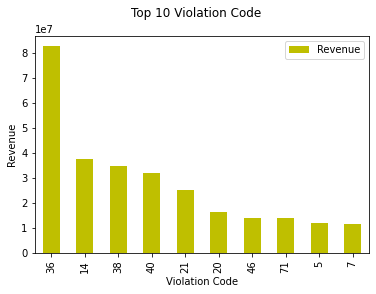

In [47]:
a_data = Selected_data.groupby(['Violation Code']). agg({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar(color='y')
plt.suptitle('Top 10 Violation Code')
plt.xlabel('Violation Code')
plt.ylabel('Revenue')
top10_data

**Total revenue generated based on County**

,Revenue
Violation County,
NY,113571175
Q,57083045
K,52214195
BX,48866365
QN,37593250
BK,33897750
MN,14021000
ST,6991400
R,5033405


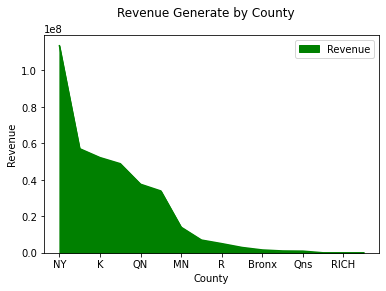

In [48]:
Revenue = Selected_data.groupby(['Violation County']).agg({'Revenue': np.sum})
Revenue_sorted = Revenue.sort_values(by='Revenue', ascending=False)
Revenue_sorted.plot.area(color='g')
plt.suptitle('Revenue Generate by County')
plt.xlabel('County')
plt.ylabel('Revenue')
Revenue_sorted

Violation County
NY       113571175
Q         57083045
K         52214195
BX        48866365
QN        37593250
BK        33897750
MN        14021000
ST         6991400
R          5033405
Kings      2928270
Bronx      1562155
0          1014135
Qns         913490
Rich          1775
RICH           305
RICHM          115
Name: Revenue, dtype: int64

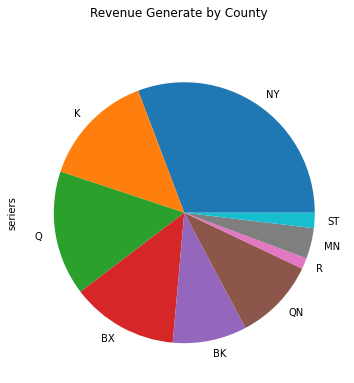

In [49]:
Rev = Revenue['Revenue'].sort_values(ascending=False)
County = ['NY', 'K', 'Q', 'BX', 'BK', 'QN', 'R', 'MN', '0', 'ST']
series = pd.Series(Rev, index=County, name='seriers')
series.plot.pie(figsize=(6,6))
plt.suptitle('Revenue Generate by County')
Rev

**Analyzing total number of violation and revenue sum by county**

,count,sum,mean
Violation County,,,
NY,1442657,113571175,78.723616
Q,843053,57083045,67.709913
K,717971,52214195,72.724657
BX,731650,48866365,66.789264
QN,751865,37593250,50.000000
BK,677955,33897750,50.000000
MN,280420,14021000,50.000000
ST,139828,6991400,50.000000
R,74320,5033405,67.726117


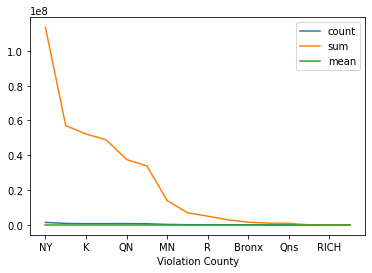

In [50]:
Analysis = new_merge[['Violation County', 'Violation Code', 'All Other Areas']]
chart = Analysis.groupby('Violation County')['All Other Areas'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)
chart.plot.line()
chart

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


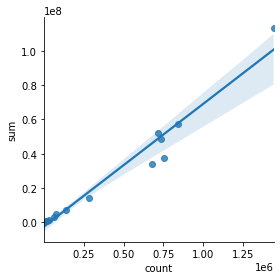

In [52]:
import seaborn as sns
sns.lmplot(x='count', y='sum',data=chart, size=4)